# Importer les librairies

In [23]:
# Manipulation et calculs
import pandas as pd # Manipulation et analyse de données
import numpy as np # odd-ratio
import math
from scipy import stats #Bibliothèque utilisée pour des calculs statistiques (ex : t-test et p-valeur)

# Visualisation
import seaborn as sns  # Bibliothèque de visualisation de données construite au-dessus de matplotlib
import matplotlib.pyplot as plt # Collection de fonctions qui permettent la réalisation de visualisation graphique

# Machine Learning
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree #plot tree permet de visualiser l'arbre

# Importer les données

In [2]:
# Loader les data
data = pd.read_csv("titanic.csv")
# Afficher la variable data correspondant aux données de base
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex` et `Embarked` avec l'argument `drop_first=True`.

In [3]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction prépare les données à l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """
    
    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
    # inplace=True indique que la modification doit être effectuée directement sur le DataFrame
    
    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed.dropna(axis=0, inplace=True)
    # axis=0 pour supprimer les lignes et non les colonnes 
    
    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed['FamilySize']=data_preprocessed['SibSp']+data_preprocessed['Parch']+1
    data_preprocessed.drop(columns=["SibSp", "Parch"], inplace=True)
    
    # Recalculer le prix du billet
    data_preprocessed['Fare']=data_preprocessed['Fare']/data_preprocessed['FamilySize']
    
    # Encoded (OHE) `Sex` et `Embarked`
    data_preprocessed = pd.get_dummies( # pd.get_dummies permet le One-Hot Encoding
        data=data_preprocessed, # Les données sur lesquelles travailler
        columns=["Sex","Embarked"], # Les colonnes à encoder
        drop_first=True # Supprime la première colonne dummy
    )
        
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    
    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [4]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


# 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il est le même que l'âge moyen de la population en 1912 (28 ans)?**
1. Identifier la ou les variables d'intérêt et spécifier le type.

- Âge, de type quantitative.

In [5]:
# Âge moyen des passagers
age_mean = data_clean["Age"].mean() 
print("La moyenne d'âge de l'échantillon est : ", age_mean)

La moyenne d'âge de l'échantillon est :  29.64209269662921


2. Réaliser une visualisation appropriée selon la ou les variables.

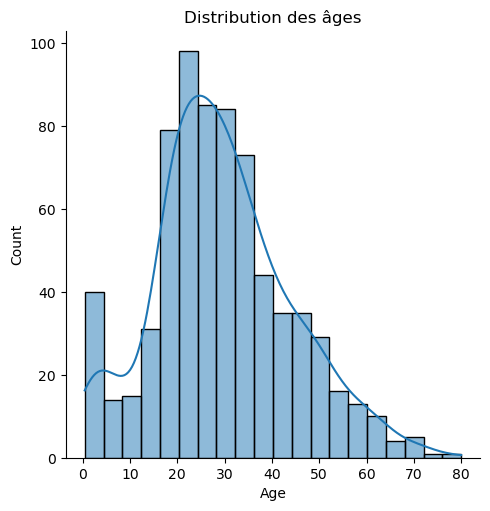

In [6]:
#Visualisation
#Histogramme de l'âge de tous les passagers du Titanic
sns.displot(
    data=data_clean, # notre dataframe
    x="Age", # colonne qui nous intéresse
    kde=True # ajouter une courbe d'estimation
)
# Titre
plt.title("Distribution des âges")
# Afficher
plt.show()

3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

$H_0: \mu_{\text{moyenne age titanic}} = \mu_{\text{moyenne age population_1912}}$, $H_1: \mu_{\text{moyenne age titanic}} \ne \mu_{\text{moyenne age population 1912}}$

4. Identifier le test statistique approprié selon les hypothèses énoncées.

- C'est un T-TEST car une seule variable et nous ne connaissons pas l'écart-type de la population car il n'est pas donné

5. Vérifier la validation des assumptions selon le test identifié.

Les assumptions pour un T-TEST sont :
    
   - L'échantillon est aléatoire -> on suppose qu'il l'est
   - La taille de l'échantillon est supérieur à 30 ou la population est normalement distribuée -> 712
   
Pour vérifier la taille de l'échantillon, il suffit consulter le nombre de lignes dans le "data_clean" --> 712 rows, donc bon

6. Calculer la statistique ainsi que la p-valeur.

In [7]:
alpha = 0.05 #Seuil de 5% comme utilisé en classe
ages = data_clean['Age'] #Tableau de tous les âges à partir de notre data frame clean

#stats.ttest_1samp permet de calculer le t-test en une seule ligne
t, p_valeur = stats.ttest_1samp(ages, popmean=28) #param de notre fonction, âge moyen calculé au-dessus et l'âge moyen 1912

print("Le test statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

Le test statistique t est de : 3.0233009800374053
La p-valeur associée est de : 0.002590259537786662


7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [8]:
# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejète l'hypothèse nulle car p-valeur < alpha.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejète pas l'hypothèse nulle car p-valeur > alpha.")

Avec un seuil alpha 0.05 on rejète l'hypothèse nulle car p-valeur < alpha.


8. Interpréter le résultat et évaluer la taille de l'effet.

En nous basant sur les sources web fournies pour interpréter le résultat, nous allons utiliser la formule suivante pour l'effet de Cohen : 

$ d = \frac{\overline{X} - \mu}{s} $

$\overline{X}$ correspond à la moyenne d'âge de notre dataset

$\mu$ correspond à la moyenne d'âge en 1912

$s$ correspond à l'écart-type



À titre d'évaluation, nous nous baserons sur les critères suivants pour l'effet de Cohen : 
- Small effect --> 0,2
- Medium effect --> 0,5
- Great effect --> 0,8


In [9]:
std_age_titanic = data_clean['Age'].std()
population_age_1912 = 28
cohen_d = (age_mean - population_age_1912) / std_age_titanic
print("L\'Effet de Cohen est de  : ", cohen_d)

L'Effet de Cohen est de  :  0.11330299449551398


Cette taille d'effet est considérée comme petite. Ceci indique que la différence d'âge n'est en réalité pas très grande.

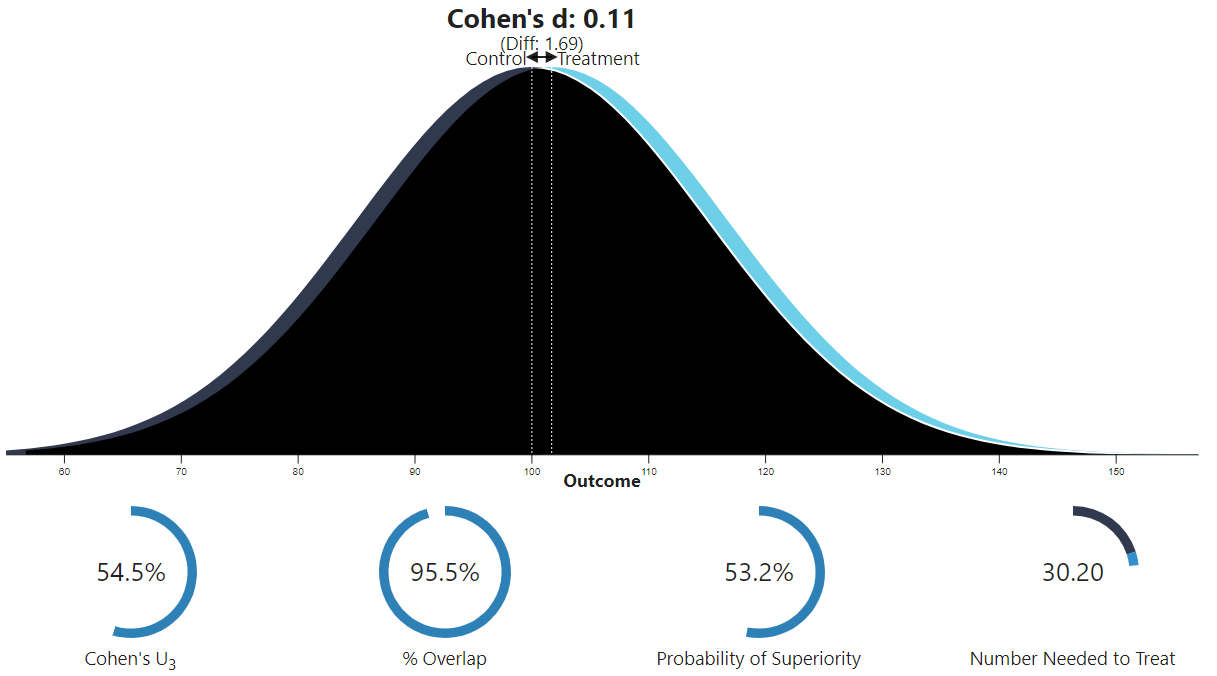

**Réponse Q1 :** Non, la moyenne n'est pas la même car statistiquement significatif : 29.642 ans pour notre échantillon, contre 28 ans pour 1912. La différence est relativement faible à l'échelle humaine (à peine plus d'un an)

**Q2: La survie dépend-elle de la classe du passager?**

1. Identifier la ou les variables d'intérêt et spécifier le type.

- Survived, de type qualitative nominale
- Pclass, de type qualitative ordinale

2. Réaliser une visualisation appropriée selon la ou les variables.

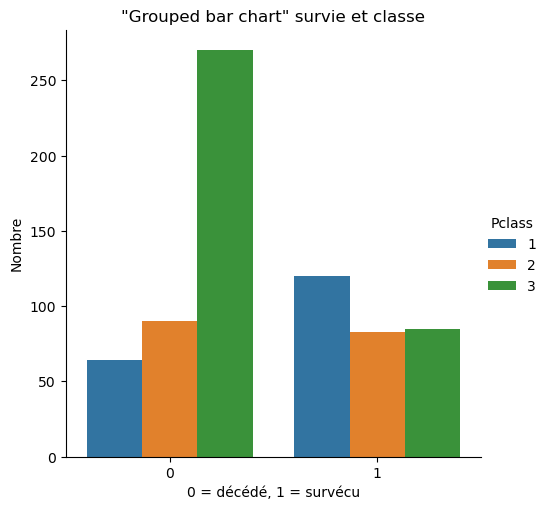

In [10]:
# Comment varie le nombre de survivants en fonction de la classe ?
sns.catplot(
    data=data_clean,
    x="Survived",
    hue="Pclass",
    kind="count" # pour obtenir le count 
)
# Changement des noms des axes
plt.xlabel("0 = décédé, 1 = survécu")
plt.ylabel("Nombre")
# Titre
plt.title("\"Grouped bar chart\" survie et classe")
# Afficher
plt.show()

Ce chart nous permet de visualiser que dans la première classe (bleue), ~2x plus de passagers ont survécu.
Le nombre de survivants est ~égal pour la deuxième classe.
Pour la troisième, ~3x de décès que de survivants.

3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

$H_0$: La survie est **indépandente** de la classe. $H_1$: La survie n'est **pas indépendante** de la classe.

4. Identifier le test statistique approprié selon les hypothèses énoncées.

On est en présence d'un CHI-SQUARE TEST (indépendance test) car nous avons deux variables qualitatives et souhaitons savoir si elles sont dépendantes ou pas.

5. Vérifier la validation des assumptions selon le test identifié.

Les assumptions pour un CHI-SQUARE TEST sont :

   - L'échantillon est aléatoire -> on suppose qu'il l'est
   - Pour chaque combinaison des niveaux des variables, nous avons besoin d’au moins 5 valeurs -> validé par l'âxe y (Nombre) du grouped bar chart
   
6. Calculer la statistique ainsi que la p-valeur.

In [11]:
#Création du tableau de contingence
observed = pd.crosstab(data_clean['Survived'], data_clean['Pclass'])

# Utilisons la foncton chi2_contingency
chi2_stat, p_val, dof, ex = stats.chi2_contingency(observed) #on passe que ce paramètre à la méthode donc le tableau de contingence
#cette méthode nous retourne plusieurs éléments : Le test statistique, La p-valeur, Les degrés de liberté, Les valeurs attendues

#Affichage des résultats
print("Le test statistique t est de : ", chi2_stat)
print("La p-valeur est de : ", p_val)
print("Les degrés de libertés sont de : ", dof)

Le test statistique t est de :  91.08074548791019
La p-valeur est de :  1.6675060315554636e-20
Les degrés de libertés sont de :  2


7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [12]:
# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_val < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejète l'hypothèse nulle car p-valeur < alpha.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejète pas l'hypothèse nulle car p-valeur > alpha.")

Avec un seuil alpha 0.05 on rejète l'hypothèse nulle car p-valeur < alpha.


La p-valeur est faible et en-dessous du seuil alpha de 5%. Cela indique que nous rejetons l'hypothèse nulle qui énonçait que la survie des passagers dépend significativement de leur classe.


8. Interpréter le résultat et évaluer la taille de l'effet.

Pour calculer la taille de l'effet dans le contexte d'un test du Chi-carré, on utilise souvent le Coefficient de Cramer (V de Cramer). Voici comment il est calculé :

$ V = \sqrt{\frac{\Phi^2}{n \cdot \min(k - 1, r - 1)}} $


$\Phi^2$ = Statistique du Chi carré

$n$ = Nombre total d'observations (passagers)

$k$ = 2 (Survived ou Not Survived), correspond au nombre de catégories dans la variable dépendante.

$r$ = 3 (Classes 1, 2, et 3), correpsond au nombre de catégories dans la variable indépendante.

In [13]:
n = observed.sum().sum()  # Nombre total d'observations

phi2 = chi2_stat / n

r, k = observed.shape

cramer_v = (phi2 / min((k - 1), (r - 1)))**0.5
print("Le Coefficient V de Cramer est de : ", cramer_v)

Le Coefficient V de Cramer est de :  0.35766240415815087


Cette valeur est considérée comme une taille d'effet moyenne à forte. Elle indique une association relativement forte entre la classe du passager et la survie.

**Résultat Q2 :** Oui, confirmé par le grouped bar chart et surtout le rejet de l'hypothèse nulle.
Nos tests indiquent que la survie des passagers dépend significativement de leur classe.

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

1. Identifier la ou les variables d'intérêt et spécifier le type.

- Age, de type quantitative
- Survived, de type qualitative nominale

2. Réaliser une visualisation appropriée selon la ou les variables (box-plot).

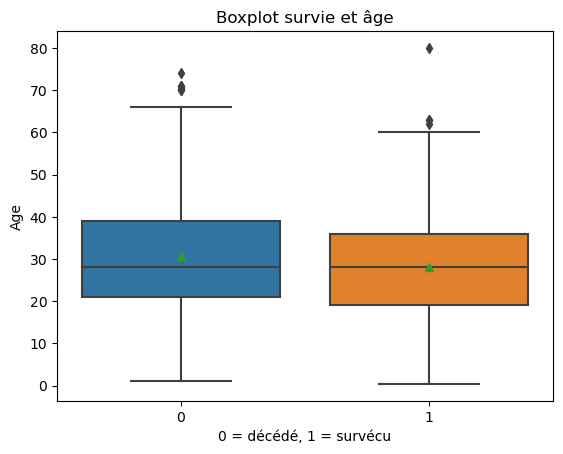

In [14]:
#Pour visualiser la relation entre une variable quantitative et une variable qualitative, on utilise un Box plot
sns.boxplot(
    data=data_clean,
    x="Survived", # qualitatif
    y="Age", # quantitatif
    showmeans=True # montrer les moyennes (False par défaut)
)
# Changement des noms des axes
plt.xlabel("0 = décédé, 1 = survécu")
# Titre
plt.title("Boxplot survie et âge")
# Afficher
plt.show()

Ce chart nous permet de visualiser la répartition des âges en fonction de la survie du passager ou non.
On affiche les valeurs extrèmes avec les losanges ainsi que les moyennes avec le triangle vert.

3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

$H_0: \mu_{\text{age survivants}} = \mu_{\text{age decedes}}$, $H_1: \mu_{\text{age survivants}} \ne \mu_{\text{age decedes}}$

4. Identifier le test statistique approprié selon les hypothèses énoncées.

On est présence d'un T-TEST à deux échantillons, car nous deux échantillons et aucune variance n'est connnue.

5. Vérifier la validation des assumptions selon le test identifié.

Les assumptions pour un T-TEST à deux échantillons sont :

   - Les échantillons sont aléatoires -> on suppose qu'il l'est
   - Les échantillons sont indépendants les uns des autre -> survie et non-survie
   - La taille des échantillons est supérieure à 30, ou les populations sont normalement distribuées -> voir graphe ci-dessous (288 survivants, 424 décédés et répartition normale

Nombre de survivants :  288
Moyenne d'âge des survivants: 28.19329861111111
Nombre de décédés :  424
Moyenne d'âge des décédés: 30.62617924528302


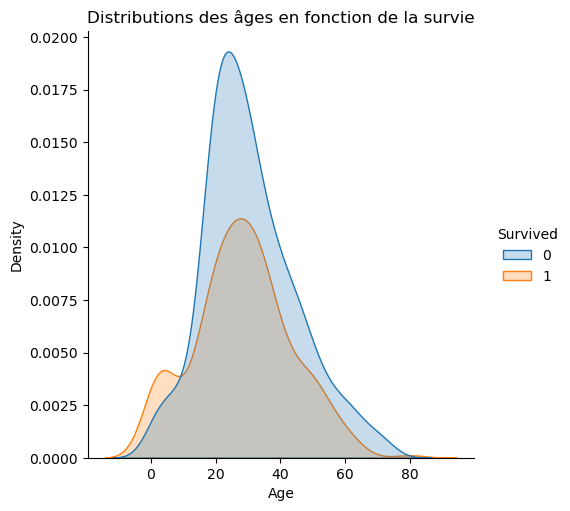

In [15]:
# Séparation des âges en fonction de la survie

#Récupération de tous les âges des survivants et des décédés sous forme de tableaux
ages_survived = data_clean[data_clean['Survived'] == 1]['Age'] 
ages_not_survived = data_clean[data_clean['Survived'] == 0]['Age']
 
# Affichage des counts et des moyennes d'âge
print('Nombre de survivants : ', ages_survived.count())
print('Moyenne d\'âge des survivants:', ages_survived.mean())
print('Nombre de décédés : ', ages_not_survived.count())
print('Moyenne d\'âge des décédés:', ages_not_survived.mean())

    
# Distributions des âges en fonction des survivants
sns.displot(
    data=data_clean,
    x="Age",
    hue="Survived",
    kind="kde",
    fill=True # remplir les distributions
)
# Titre
plt.title("Distributions des âges en fonction de la survie")
# Afficher
plt.show()

6. Calculer la statistique ainsi que la p-valeur.

In [16]:
# Test t pour échantillons indépendants
t_stat, p_value = stats.ttest_ind(
    ages_survived,
    ages_not_survived,
    alternative="two-sided",
    equal_var=False
)
 
# Affichage des résultats
print("Le test statistique t est de : ", t_stat)
print("La p-valeur est de : ", p_value)

Le test statistique t est de :  -2.184486214939826
La p-valeur est de :  0.02931497754601072


7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [17]:
# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("Il existe une différence d'âge significative entre les passagers qui ont survécu et ceux qui sont décédés.")
else:
    print("Il n'existe pas de différence d'âge significative entre les passagers qui ont survécu et ceux qui sont décédés.")

Il existe une différence d'âge significative entre les passagers qui ont survécu et ceux qui sont décédés.


La p-valeur (0.0293) est inférieure au seuil alpha de 0.05. Nous rejetons l'hypothèse nulle.
Cela indique qu'il existe une différence statistiquement significative dans l'âge moyen des passagers qui ont survécu et ceux qui sont décédés.

8.Interpréter le résultat et évaluer la taille de l'effet.

Comme nous sommes en présence d'un T-TEST à 2 échantillons, nous allons utiliser le coefficient de Cohen.
Etant donné que les variances sont inégales, on utilise une formule "revisitée" : 

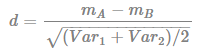
Source : https://www.datanovia.com/en/lessons/t-test-effect-size-using-cohens-d-measure/

In [29]:
#Calcul du coefficient de Cohen :
cohen_d = np.abs((ages_survived.mean() - ages_not_survived.mean()))/math.sqrt((ages_survived.var()+ages_not_survived.var())/2)

print("L\'Effet de Cohen est de  : ", cohen_d)

L'Effet de Cohen est de  :  0.16755731389524692


Selon nos critères, un coefficient de Cohen de 0.2 est considéré comme un petit effet. Bien que la différence d'âge soit statistiquement significative, l'effet est relativement faible.

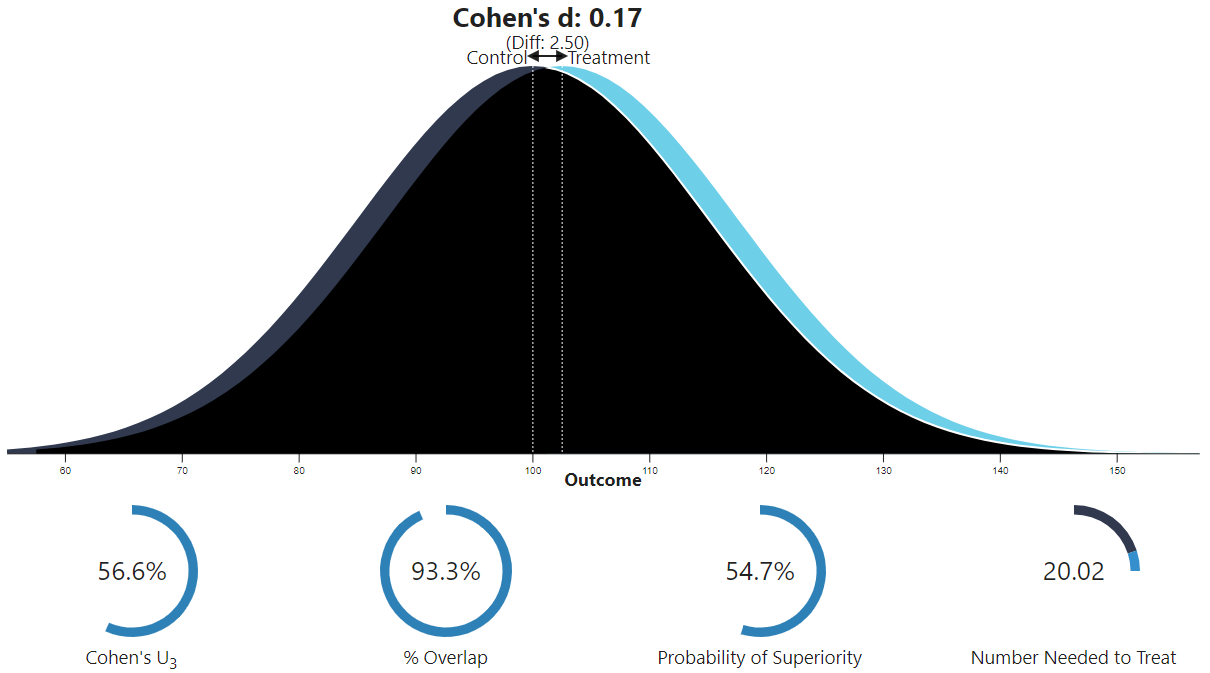

**Résultat Q3 :** Selon notre seul alpha, la différence des moyennes est significative. Lorsqu'on compare les moyennes (28 et 30), on pourrait être tenté de dire qu'elles ne sont pas si différentes. Or, notre test d'hypothèse nous indique plutôt si la différence est susceptible d'être due au hasard ou pas.

Statistiquement, la différence est importante, mais lorsqu'un "humain" effectue cette comparaison, on a l'impression que ça ne l'est pas.


Bien que l'âge ait joué un rôle dans la survie, il n'était pas le facteur le plus déterminant. 

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

1. Identifier la ou les variables d'intérêt et spécifier le type.

- Age, de type quantitative
- Fare (Prix), de type quantitative

2. Réaliser une visualisation appropriée selon la ou les variables.

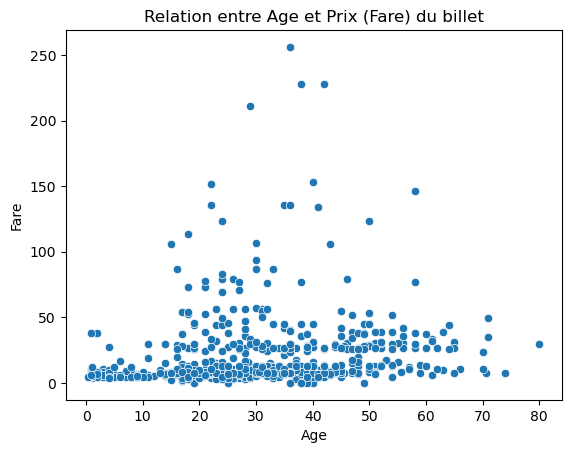

In [130]:
#Pour visualiser la relation entre une variable qualitative et une autre variable qualitative, on utilise un Scatter plot

data_without_abberante = data_clean[data_clean['Fare'] <= 400]

# Scatter plot entre Age et Fare
sns.scatterplot(
    data=data_without_abberante,
    x="Age",
    y="Fare"
)
# Titre 
plt.title("Relation entre Age et Prix (Fare) du billet")
# Afficher 
plt.show()

Ce chart nous permet de visualiser la relation entre l'âge et le prix du billet.
À partir de ce graphe, nous ne pouvons tirer aucune conclusion pour l'instant.

3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

$H_0$: $\rho$ = 0, il n'y a pas de corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.

$H_1$: $\rho$ $\ne$ 0, il y a une corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.

4. Identifier le test statistique approprié selon les hypothèses énoncées.

Comme on n'a pas les moyennes et qu'on a deux variables quantitatives, on utilise un t-test de corrélation.

5. Vérifier la validation des assumptions selon le test identifié.

Les assumptions pour un T-TEST de corrélation à deux échantillons sont :
 - Les données sont quantitatives et sont obtenues à partir d’un échantillon aléatoire -> oui et on suppose que c'est un échantillon aléatoire
 - Le scatter plot montre que les données sont approximativement liées linéairement -> elles le sont sous la forme d'une ligne
 - Il n’y a pas de valeurs abberantes dans les données -> la seule valeur abbérante a été enlevée
 - Les variables doivent chacune suivre une loi normale -> on suppose que âge et prix du billet suivent les deux une loi normale
 
6. Calculer la statistique ainsi que la p-valeur.

In [131]:
#Test de Pearson (T-test de corrélation)
r, p_valeur = stats.pearsonr(
    data_without_abberante["Age"],
    data_without_abberante["Fare"]
)
 
print(f"La corrélation (r) entre age des passagers et le prix des billets est de {r}.")
print("La p-valeur est de : ", p_valeur)

La corrélation (r) entre age des passagers et le prix des billets est de 0.18369527278264694.
La p-valeur est de :  8.304051203405285e-07


7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [31]:
# Si p-valeur < alpha, on rejette l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha à ", alpha, " on rejette l'hypothèse nulle.")
    print("Il y a une corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.")
# Sinon, on ne rejette pas l'hypothèse nulle
else:
    print("Avec un seuil alpha à" ,alpha, " on ne rejette pas l'hypothèse nulle.")
    print("Il n'y a pas de corrélation entre `l'âge des passagers` et `le prix des billets` dans la population.")

Avec un seuil alpha à  0.05  on rejette l'hypothèse nulle.
Il y a une corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.


8. Interpréter le résultat et évaluer la taille de l'effet.

Le coefficient de corrélation de Pearson sert également de mesure pour la taille de l'effet.

On va interpréter le résultat selon ces critères :
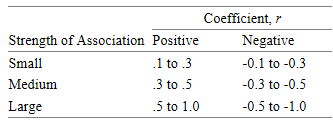


Avec un coefficient de Cohen de 0.1905, c'est une faible corrélation.
Ce coefficient correspond à une relation faible.
Autrement dit, l'âge des passagers a un effet limité sur le prix des billets.

**Résultat Q4 :** Comme on rejette l'hypothèse nulle, on peut dire qu'il existe une corrélation entre l'âge et le prix du billet.

En conclusion, il existe une faible mais statistiquement significative corrélation positive entre l'âge des passagers et le prix de leurs billets.

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

In [52]:
# Séparer les features et la target
X = data_clean.drop(columns=["Survived"]) # toutes les colonnes sauf Survived, qui est notre target
y = data_clean["Survived"] # y ce qu'on veut analyser, donc Survived

# Générer un model de régression logistique - pareil que pour la régression
model = sm.Logit(
    y,
    sm.add_constant(X) # il faut rajouter une constante, qui n'est pas là par défaut
)

# Fit le model
model_fit = model.fit()

# Affichage du résumé
print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.445519
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.3398
Time:                        15:54:13   Log-Likelihood:                -317.21
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.324e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7251      0.659      8.691      0.000       4.434       7.016
Pclass        -1.1795      0.

#### Interprétation du odd ratio

In [53]:
# On calcule le odds ratio
odds_ratio = np.exp(model_fit.params)

pd.DataFrame(odds_ratio, columns=["Odds ratio"])

,Odds ratio
const,306.463481
Pclass,0.307435
Age,0.959031
Fare,1.003015
FamilySize,0.824145
Sex_male,0.070317
Embarked_Q,0.436462
Embarked_S,0.662917


Plus c'est proche de 0, plus il y a un impact sur la survie


- **L'âge**, **le prix du billet** et **la taille de la famille** ont peu d'impact sur la probabilité de survie (odd ratio proche de 1). Peu importe la valeur de ces trois variables, la corrélation est faible concernant le taux de survie.


- **La classe**, et **le lieu d'embarcation** ont un impact modéré sur la probabilité de survie.

- **Le sexe** quant à lui, a un très fort impact sur la probabilité de survie car l'odd ratio est très proche de 0. (un homme a beaucoup plus de chance de décéder qu'une femme)


#### Interprétation des coefficients


- **Pclass** : 
  - Coefficient : -1.1795
  - Interprétation : Un coefficient négatif suggère que les passagers de classes supérieures (classe 1) avaient de meilleures chances de survie par rapport aux classes inférieures.
 
- **Age** : 
  - Coefficient : -0.0418
  - Interprétation : L'âge a un effet négatif sur la probabilité de survie, indiquant que les passagers plus jeunes avaient de meilleures chances de survie bien que ça ne soit pas l'impact le plus important.
 
- **Fare** : 
  - Coefficient : 0.0030
  - Interprétation : Le prix du billet ajusté a un petit effet positif sur la survie, suggérant que payer plus (par personne) augmentait légèrement les chances de survie. L'impact est tout de même minimisé en comparaison avec d'autres coef.
 
- **FamilySize** : 
  - Coefficient : -0.1934
  - Interprétation : Un plus grand nombre de membres de la famille semble diminuer les chances de survie.
 
- **Sex_male** : 
  - Coefficient : -2.6547
  - Interprétation : Être un homme réduit considérablement les chances de survie, ce qui est en accord avec le principe de « les femmes et les enfants d'abord ».
 
- **Embarked_Q** : 
  - Coefficient : -0.8291
 
- **Embarked_S** : 
  - Coefficient : -0.4111

**Interprétation des coefficients des ports d'embarcation :**

In [54]:
#Compte le nombre de passagers à chaque port d'embarcation
embarked_q_count = data_clean['Embarked_Q'].sum()
embarked_s_count = data_clean['Embarked_S'].sum()
embarked_other_count = len(data_clean) - (embarked_q_count + embarked_s_count)

print("Passagers de Queenstown :", embarked_q_count)
print("Passagers de Southampton :", embarked_s_count)
print("Passagers de Cherbourg :", embarked_other_count)

Passagers de Queenstown : 28
Passagers de Southampton : 554
Passagers de Cherbourg : 130


Ces chiffres expliquent la différence entre les  coefficients Embarked_Q et Embarked_S. Comme beaucoup moins de passagers ont embarqué à Queenstown, le coefficient sera d'autant plus faible.

#### Interprétation des p-valeurs :
 
##### Coefficients avec p-valeurs < 0.05 (statistiquement significatifs) :
 
- **Pclass, Age, FamilySize, et Sex_male** :
  - Ces variables ont des p-valeurs très petites, ce qui suggère que ces coefficients sont statistiquement significatifs. Cela signifie que ces variables ont un fort impact sur la probabilité de survie des passagers.
 
##### Coefficients avec p-valeurs ≥ 0.05 (non statistiquement significatifs) :
 
- **Fare, Embarked_Q, et Embarked_S** :
  - Ces variables ont des p-valeurs plus élevées, ce qui indique que l'effet de ces variables sur la survie n'est pas statistiquement significatif.

#### Test utilisé
Chacune de ces p-valeurs a été calculée en utilisant un test de Wald.
Le test de Wald est une approche standard pour tester l'hypothèse nulle que le coefficient d'une variable dans un modèle statistique est égal à zéro.
Pour une régression logistique, cela signifie qu'on teste si chaque variable indépendante a un effet significatif sur la variable dépendante (ici, la variable Survived).

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4.**

Visualisation de l'arbre.

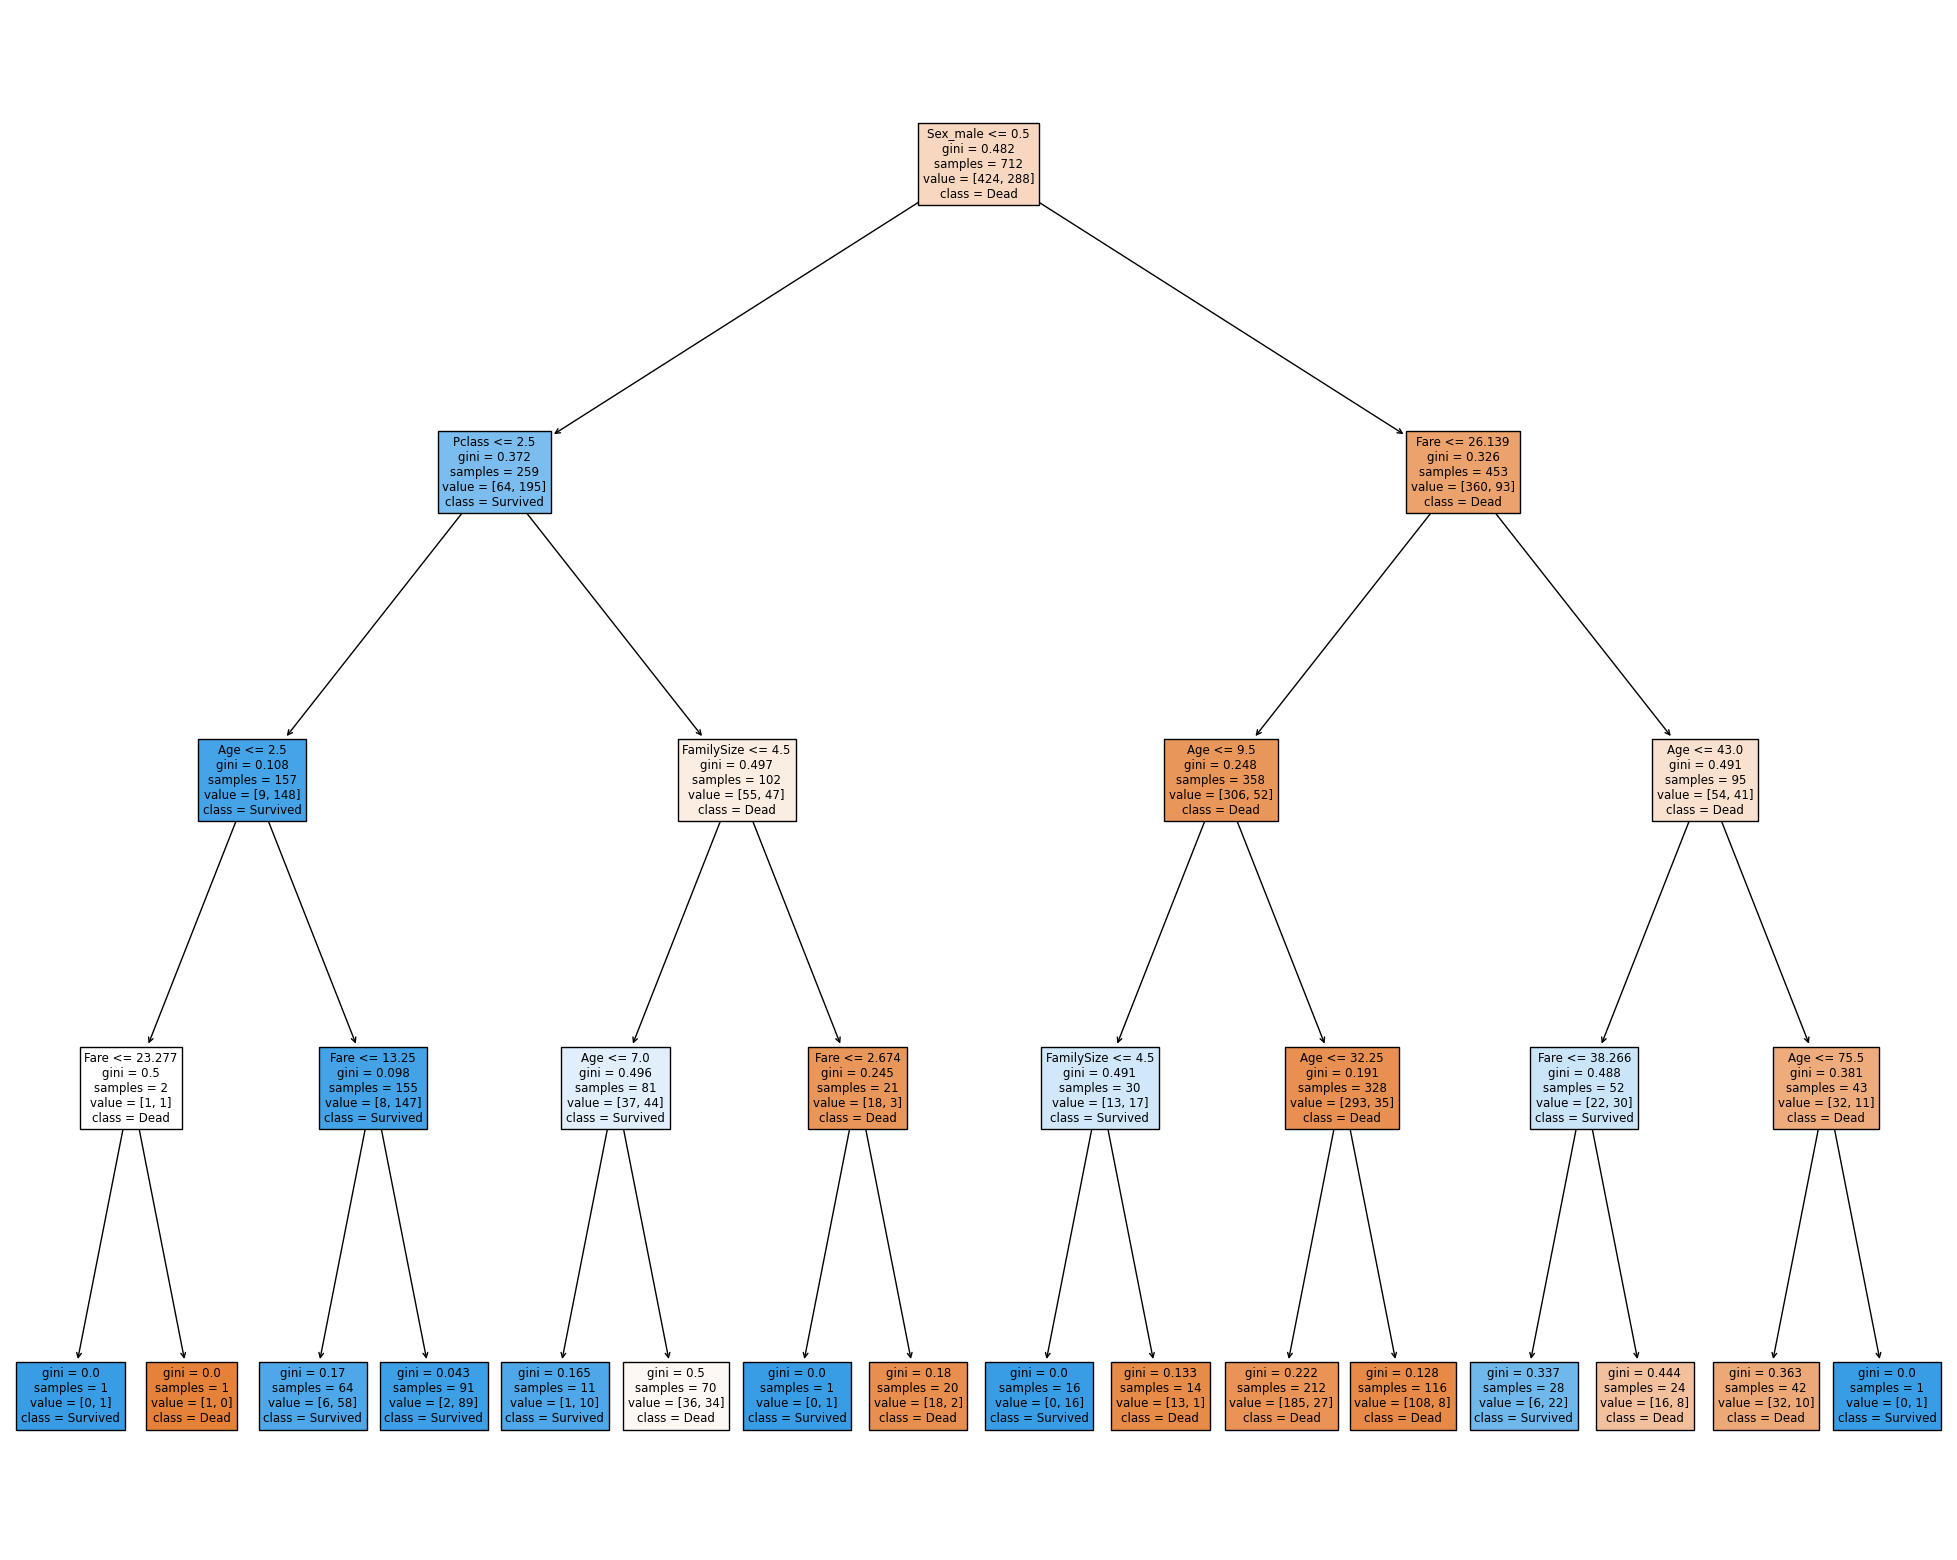

In [49]:
# Générer un model d'arbre de classification
model = DecisionTreeClassifier(max_depth=4) # on utilise max_depth=4

# Fit le model
model_fit = model.fit(X, y)

# Arbre
fig = plt.figure(figsize=(25, 20))
plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=["Dead", "Survived"],  # Nom pour les deux classes
    filled=True
)

# Afficher
plt.show()

Expliquer quelques décisions :

- À la racine, on retrouve nos 424 décédés et 288 survivants. La classe est orangée car la majorité sont des personnes décédées. La première séparation sera effecutée sur les sexes : femmes à gauche car rempli la condition Sex_male <= 0.5 et du coup hommes à droite.
- Si on continue sur les femmes, on voit que 195 ont survécu, donc classe en bleu car la majorié a survécu. Ensuite, on sépare les femmes des classes 1 et 2 à gauche et les femmes en classe 3 à droite.
- Prenons les femmes de la classe 3 où on peut voir que la majorité est décédée -> 55 / 102. Le tri s'effectue ensuite sur la taille de la famille -> supérieur à 5 à droite et le reste à gauche.
- Passons tout au bout de l'arbre : Femme -> Classe 3 -> Famille inférieur à 4.5 -> Âge inférieur à 7. Il y a en tout 11 femmes de classe 3 ayant une famille inférieure à 4.5 et un âge inférieur à 7. Pour ce persona, les chances de survie étaient très élevées : seule une personne est décédée sur les 11. Par ailleurs, la pureté est maximale au bas de l'arbre.

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**

## Résumé des analyses statistiques sur les données du Titanic

La régression logistique offre une vue quantifiée de l'impact de chaque variable, tandis que l'arbre de décision fournit une visualisation des décisions du modèle.
### Régression logistique

La régression logistique a permis d'identifier les facteurs qui affectent significativement la probabilité de survie sur le Titanic. (Sex_male, Pclass sont les plus importants)
 

### Arbre de décision

L'arbre de décision fournit une vue graphique des décisions prises dans le modèle pour prédire la survie en combinant plusieurs variables. Au niveau le plus bas de l'arbre, nous avons plusieurs types de personnes en fonction de leur survie. Les points clés de l'arbre de décision sont :
  
1. **Critères de décision** : 

   - Utilisation des variables telles que la classe des passagers, l'âge et le sexe pour prédire la survie.
 
2. **Profondeur limitée (maximum 4)** : 

   - Rend l'arbre plus lisible.
 
### Points clés de l'étude
 
- **Influence de la classe et du sexe** : 

  - La classe et le sexe ont une influence significative, mettant en évidence les privilèges sociaux dans les situations de naufrage.
 
- **Rôle de l'âge** : 

  - Favorise légèrement la survie des jeunes.
 
- **Impact de la taille de la famille** : 

  - Comme il y a légèrement moins de chances de survie en famille, cela souligne que les grandes familles ont peu survécu.